In [1]:
import pandas as pd
import os
import math
import numpy as np


In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!pip install sdv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.8/74.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.4/165.4 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 53.5 MB/s eta 0:00:00


In [10]:
# Set the data directory and index table path
full_path = "/content/gdrive/MyDrive/ebike/E-Bike/Index Table.csv"

In [11]:
trip_data = pd.read_csv(full_path)

In [12]:

trip_data

,Trip ID,Height Range(CM),Weight Range(Kg),Starting Point,End Point,Duration(S),Distance(Km),Avg Speed(Km/h),Total Ascent(m),Avg Grade(%),Start_Voltage(V),End_Voltage(V),Energy(%),Wh/km,Power Assistance Level,Wind speed(Km/h),Wind Direction,Weather,Precipitation(mm),Temperature(° C)
0,1,175-180,65-70,"53.3853148, -6.2559811","53.3857993, -6.2558708",2886,9.36,15.5,52,0.00120,41.6,36.8,69.99,33.65,4,34.0,S,Light drizzle,1.2,16.0
1,2,175-180,65-70,"53.3850353, -6.2556208","53.3836596, -6.2571436",316,1.36,15.7,5,-0.00350,38.0,37.4,12.80,42.35,4,34.0,W,Light drizzle,1.2,16.0
2,3,175-180,65-70,"53.3854601, -6.2563126","53.3851441, -6.2536486",668,2.66,15.2,13,0.00040,37.4,37.0,7.13,12.06,3,17.6,WSW,Partly cloudy,0.0,14.0
3,4,175-180,65-70,"53.3849626, -6.253459","53.3851525, -6.2536408",562,2.82,18.2,18,0.00030,37.0,36.6,5.92,9.45,5,17.6,WSW,Partly cloudy,0.0,14.0
4,5,175-180,65-70,"53.3852895, -6.2539675","53.3853593, -6.2560506",68,0.30,16.0,0,-0.00070,36.6,36.5,1.31,19.65,4,17.6,WSW,Partly cloudy,0.0,14.0
5,6,175-180,65-70,"53.3854425, -6.256422","53.3852896, -6.2557685",691,4.90,18.2,38,0.00050,36.5,35.0,13.50,12.40,5,16.9,S,Cloudy,0.0,16.0
6,7,175-180,65-70,"53.3855875, -6.2565723","53.3853351, -6.2557181",738,4.21,20.5,23,0.00000,41.4,39.8,7.71,8.24,5,27.4,S,Overcast,0.0,16.7
7,8,175-180,65-70,"53.3855301, -6.2564635","53.3852386, -6.2558246",690,4.43,20.3,29,0.00040,41.6,40.3,3.56,3.62,5,27.4,SSE,Overcast,0.1,16.9
8,9,175-180,60-65,"53.3851591, -6.2561011","53.3853125, -6.260011",720,2.88,15.7,12,0.00070,40.7,40.3,1.87,2.92,4,11.5,WSW,Overcast,0.0,10.4
9,10,175-180,60-65,"53.3853426, -6.259924","53.3848591, -6.2586886",665,3.03,16.4,17,-0.00020,40.3,39.8,4.35,6.46,3,11.5,WSW,Overcast,0.0,10.4


In [13]:

# Change the intervals to medians
trip_data['Height Range(CM)'] = trip_data['Height Range(CM)'].str.extract(r'(?<=-)(\d+)').astype(int) - 2.5
trip_data['Weight Range(Kg)'] = trip_data['Weight Range(Kg)'].str.extract(r'(?<=-)(\d+)').astype(int) - 2.5

In [ ]:
trip_data

In [16]:
# drop unnecessary columns
# trip_data = trip_data.drop(['starting_point','destination_point'], axis=1)
trip_data = trip_data[['Height Range(CM)', 'Weight Range(Kg)', 'Distance(Km)', 'Avg Speed(Km/h)', 'Total Ascent(m)', 'Avg Grade(%)', 'Wh/km', 'Power Assistance Level', 'Wind speed(Km/h)','Wind Direction','Weather','Precipitation(mm)','Temperature(° C)']]
real_data = trip_data

real_data

,Height Range(CM),Weight Range(Kg),Distance(Km),Avg Speed(Km/h),Total Ascent(m),Avg Grade(%),Wh/km,Power Assistance Level,Wind speed(Km/h),Wind Direction,Weather,Precipitation(mm),Temperature(° C)
0,177.5,67.5,9.36,15.5,52,0.00120,33.65,4,34.0,S,Light drizzle,1.2,16.0
1,177.5,67.5,1.36,15.7,5,-0.00350,42.35,4,34.0,W,Light drizzle,1.2,16.0
2,177.5,67.5,2.66,15.2,13,0.00040,12.06,3,17.6,WSW,Partly cloudy,0.0,14.0
3,177.5,67.5,2.82,18.2,18,0.00030,9.45,5,17.6,WSW,Partly cloudy,0.0,14.0
4,177.5,67.5,0.30,16.0,0,-0.00070,19.65,4,17.6,WSW,Partly cloudy,0.0,14.0
5,177.5,67.5,4.90,18.2,38,0.00050,12.40,5,16.9,S,Cloudy,0.0,16.0
6,177.5,67.5,4.21,20.5,23,0.00000,8.24,5,27.4,S,Overcast,0.0,16.7
7,177.5,67.5,4.43,20.3,29,0.00040,3.62,5,27.4,SSE,Overcast,0.1,16.9
8,177.5,62.5,2.88,15.7,12,0.00070,2.92,4,11.5,WSW,Overcast,0.0,10.4
9,177.5,62.5,3.03,16.4,17,-0.00020,6.46,3,11.5,WSW,Overcast,0.0,10.4


In [17]:
import sdv
print(sdv.__version__)


1.7.0


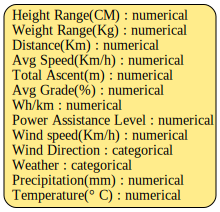

In [18]:

# check metadata
from sdv.metadata import SingleTableMetadata
metadata = SingleTableMetadata()

metadata.detect_from_dataframe(data=real_data)
metadata.visualize()

In [19]:
metadata.update_column(
    column_name='Wind Direction',
    sdtype='categorical')

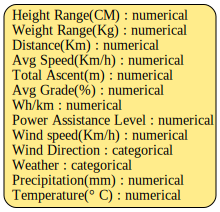

In [20]:

metadata.visualize()

In [21]:

# generate M rows of fake data
M = 10000
from sdv.lite import SingleTablePreset

synthesizer = SingleTablePreset(
    metadata,
    name='FAST_ML'
)

synthesizer.fit(
    data=real_data
)

synthetic_data = synthesizer.sample(
    num_rows=M
)

synthetic_data.head()

/usr/local/lib/python3.10/dist-packages/rdt/transformers/categorical.py:329: FutureWarning: The 'FrequencyEncoder' transformer will no longer be supported in future versions of the RDT library. Please use the 'UniformEncoder' transformer instead.
  warnings.warn(


,Height Range(CM),Weight Range(Kg),Distance(Km),Avg Speed(Km/h),Total Ascent(m),Avg Grade(%),Wh/km,Power Assistance Level,Wind speed(Km/h),Wind Direction,Weather,Precipitation(mm),Temperature(° C)
0,175.297695,68.548540,3.667714,19.017932,20,0.000187,20.142421,4,21.812265,S,Patchy rain possible,0.321657,14.921775
1,174.991830,58.340531,1.817611,17.177770,16,-0.001245,18.615901,4,23.485431,S,Cloudy,0.201911,11.534724
2,173.070259,57.500000,2.030147,12.904371,4,-0.003700,13.409161,2,11.953094,S,Cloudy,0.194716,9.400000
3,177.139113,71.856411,4.921250,12.743994,28,-0.000834,16.730062,2,21.462933,S,Clear,0.516069,11.989147
4,176.046253,60.050820,2.325863,16.139703,30,0.001332,3.633401,3,34.051798,S,Cloudy,0.000000,13.521982


In [22]:

# evaluation
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    real_data,
    synthetic_data,
    metadata
)


Generating report ...
(2/2) Evaluating Column Pair Trends: : 100%|██████████| 78/78 [00:01<00:00, 47.52it/s]

Overall Quality Score: 80.34%

Properties:
- Column Shapes: 76.89%
- Column Pair Trends: 83.8%


In [ ]:

synthetic_data.to_csv('/content/gdrive/MyDrive/ebike/E-Bike/fake_data_new.csv')
